== Daily Challenge : Comprehensive Mobile Price Analysis ==

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
# 1. Data Loading and Exploration
df = pd.read_csv('train.csv')
print("Dataset Shape:", df.shape)
print("\nFirst 5 Rows:")
display(df.head())
print("\nData Types:")
print(df.dtypes)
print("\nSummary Statistics:")
display(df.describe())

Dataset Shape: (2000, 21)

First 5 Rows:


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1



Data Types:
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

Summary Statistics:


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [5]:
# 2. Data Cleaning and Preprocessing
# Handle missing values
print("\nMissing Values Before:")
print(df.isnull().sum())
df.fillna(df.median(), inplace=True)  # Numerical columns
df.fillna(df.mode().iloc[0], inplace=True)  # Categorical columns

# Encode categorical features
cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])
    
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())


Missing Values Before:
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Missing Values After Cleaning:
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64



Feature Analysis:

battery_power:
Mean: 1238.52
Median: 1226.00
Std Dev: 439.31
Skewness: 0.03
Kurtosis: -1.22

blue:
Mean: 0.49
Median: 0.00
Std Dev: 0.50
Skewness: 0.02
Kurtosis: -2.00

clock_speed:
Mean: 1.52
Median: 1.50
Std Dev: 0.82
Skewness: 0.18
Kurtosis: -1.32

dual_sim:
Mean: 0.51
Median: 1.00
Std Dev: 0.50
Skewness: -0.04
Kurtosis: -2.00

fc:
Mean: 4.31
Median: 3.00
Std Dev: 4.34
Skewness: 1.02
Kurtosis: 0.27

four_g:
Mean: 0.52
Median: 1.00
Std Dev: 0.50
Skewness: -0.09
Kurtosis: -1.99

int_memory:
Mean: 32.05
Median: 32.00
Std Dev: 18.14
Skewness: 0.06
Kurtosis: -1.22

m_dep:
Mean: 0.50
Median: 0.50
Std Dev: 0.29
Skewness: 0.09
Kurtosis: -1.27

mobile_wt:
Mean: 140.25
Median: 141.00
Std Dev: 35.39
Skewness: 0.01
Kurtosis: -1.21

n_cores:
Mean: 4.52
Median: 4.00
Std Dev: 2.29
Skewness: 0.00
Kurtosis: -1.23

pc:
Mean: 9.92
Median: 10.00
Std Dev: 6.06
Skewness: 0.02
Kurtosis: -1.17

px_height:
Mean: 645.11
Median: 564.00
Std Dev: 443.67
Skewness: 0.67
Kurtosis: -0.32

px_wid

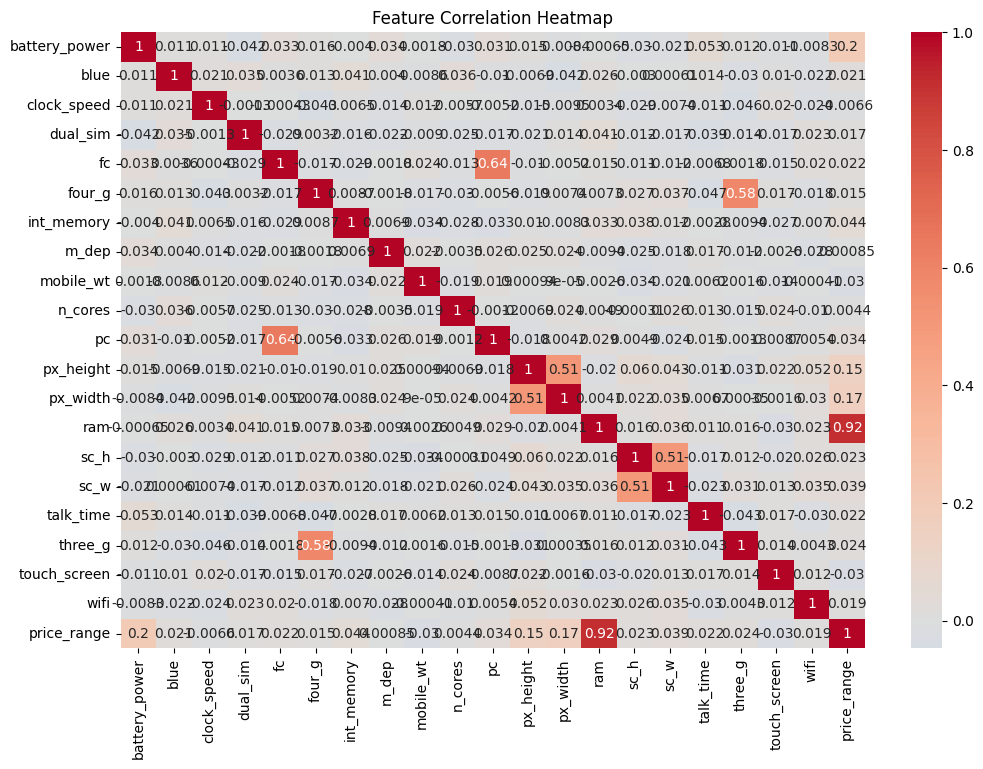

In [6]:
# 3. Statistical Analysis
# Feature distributions
print("\nFeature Analysis:")
for col in df.columns:
    print(f"\n{col}:")
    print(f"Mean: {np.mean(df[col]):.2f}")
    print(f"Median: {np.median(df[col]):.2f}")
    print(f"Std Dev: {np.std(df[col]):.2f}")
    print(f"Skewness: {stats.skew(df[col]):.2f}")
    print(f"Kurtosis: {stats.kurtosis(df[col]):.2f}")

# Hypothesis testing (Example: Price difference between 4G and non-4G phones)
price_4g = df[df['four_g'] == 1]['price_range']
price_non4g = df[df['four_g'] == 0]['price_range']
t_stat, p_val = stats.ttest_ind(price_4g, price_non4g)
print(f"\n4G vs Non-4G Price T-test: t={t_stat:.2f}, p={p_val:.4f}")

# Correlation analysis
corr_matrix = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

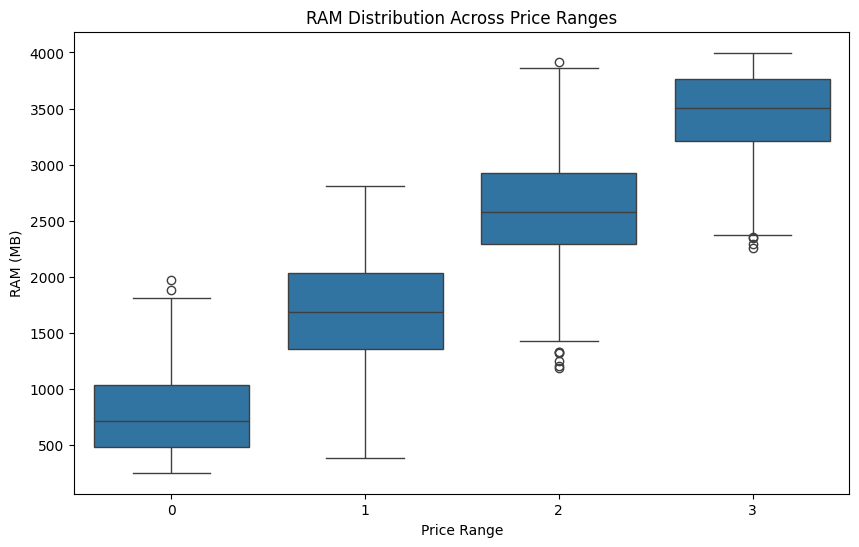

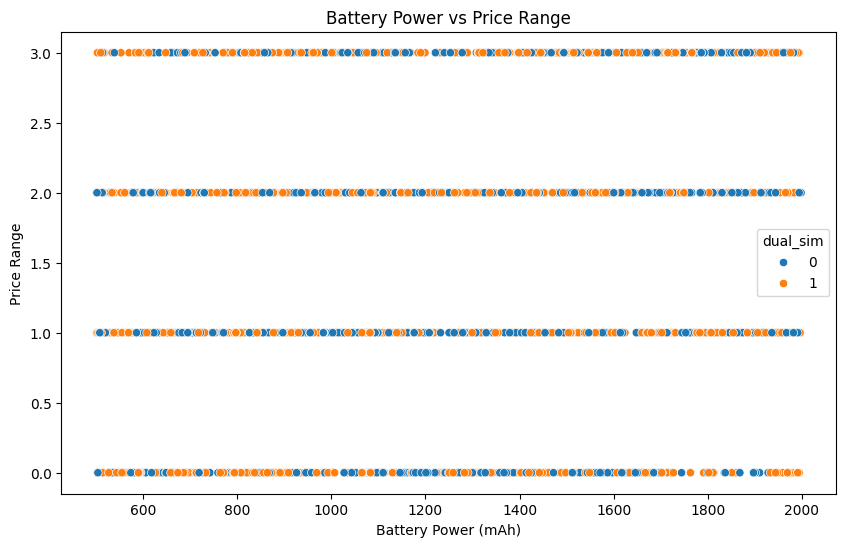

In [7]:
# 4. Advanced Visualizations
# Price distribution by RAM
plt.figure(figsize=(10,6))
sns.boxplot(x='price_range', y='ram', data=df)
plt.title("RAM Distribution Across Price Ranges")
plt.xlabel("Price Range")
plt.ylabel("RAM (MB)")
plt.show()

# Battery vs Price scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='battery_power', y='price_range', data=df, hue='dual_sim')
plt.title("Battery Power vs Price Range")
plt.xlabel("Battery Power (mAh)")
plt.ylabel("Price Range")
plt.show()

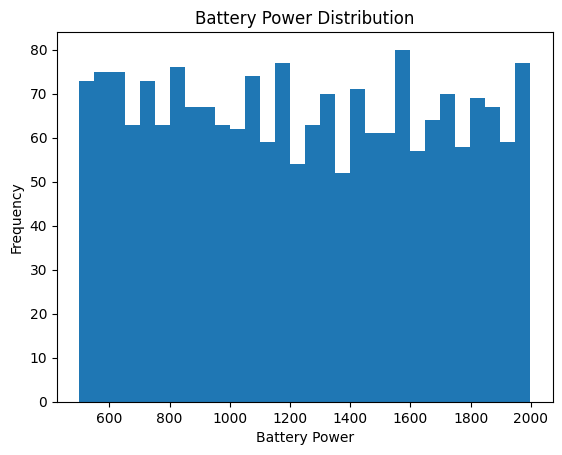

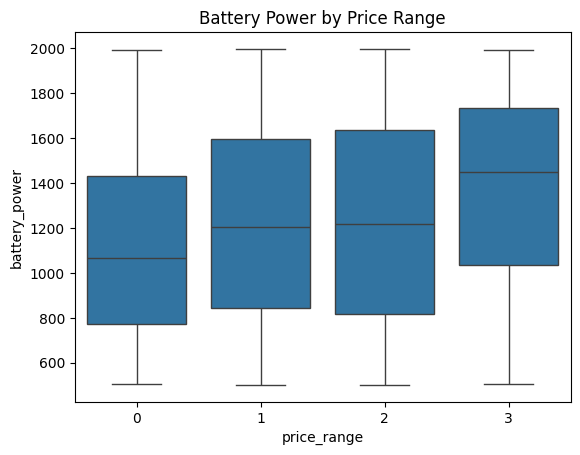

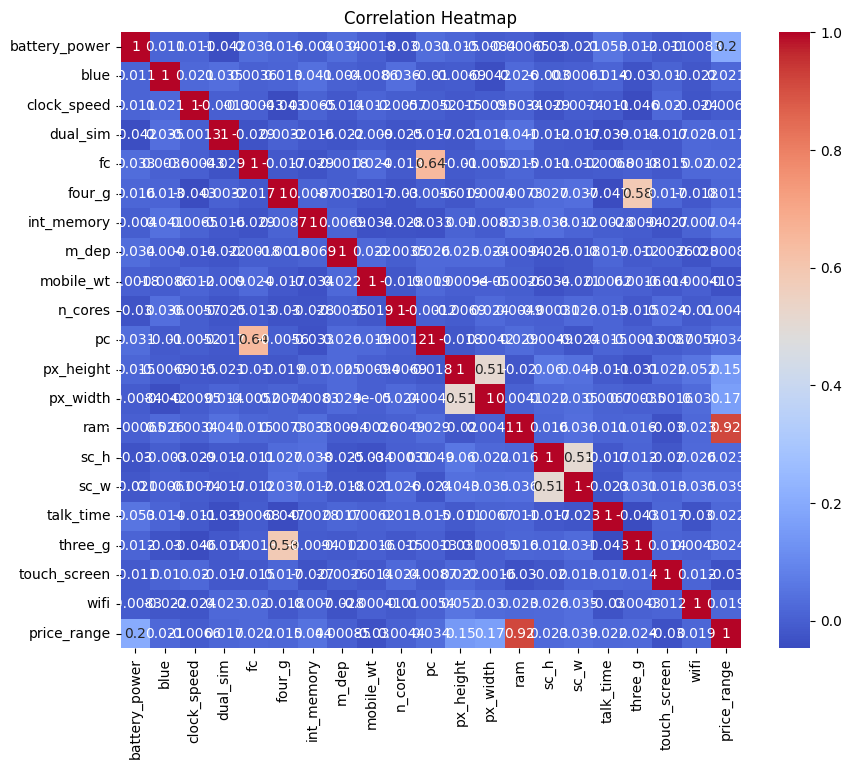

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogramme
plt.hist(df['battery_power'], bins=30)
plt.title('Battery Power Distribution')
plt.xlabel('Battery Power')
plt.ylabel('Frequency')
plt.show()

# Boxplot
sns.boxplot(x='price_range', y='battery_power', data=df)
plt.title('Battery Power by Price Range')
plt.show()

# Heatmap des corrélations
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

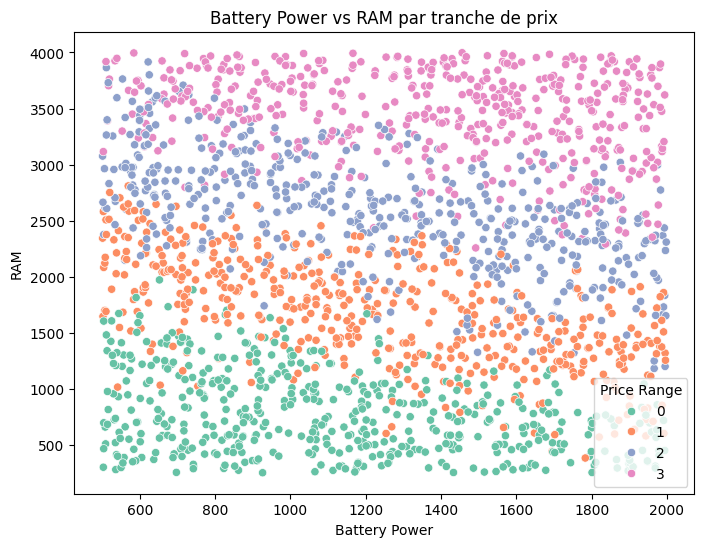

In [10]:
# 1. Scatter plots (nuages de points)
# Objectif : Visualiser la relation entre deux variables continues (ex. RAM vs battery_power) et leur lien avec le prix.

# RAM vs battery_power colored by price_range
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='battery_power', y='ram', hue='price_range', palette='Set2')
plt.title('Battery Power vs RAM par tranche de prix')
plt.xlabel('Battery Power')
plt.ylabel('RAM')
plt.legend(title='Price Range')
plt.show()

/var/folders/r6/h24sb_sj1c579ck062z_39dm0000gn/T/ipykernel_94348/2789051621.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price_range', y='int_memory', data=df, palette='Blues')


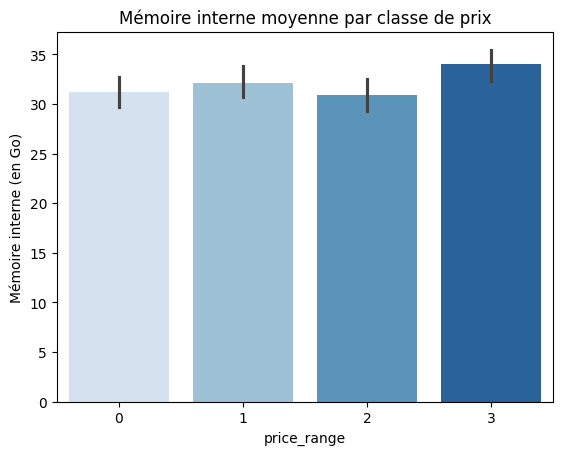

In [11]:
#2. Barplots
# Objectif : Comparer les moyennes de chaque variable selon la catégorie de prix (utile pour les variables discrètes).

# Moyenne de la mémoire interne par classe de prix
sns.barplot(x='price_range', y='int_memory', data=df, palette='Blues')
plt.title('Mémoire interne moyenne par classe de prix')
plt.ylabel('Mémoire interne (en Go)')
plt.show()

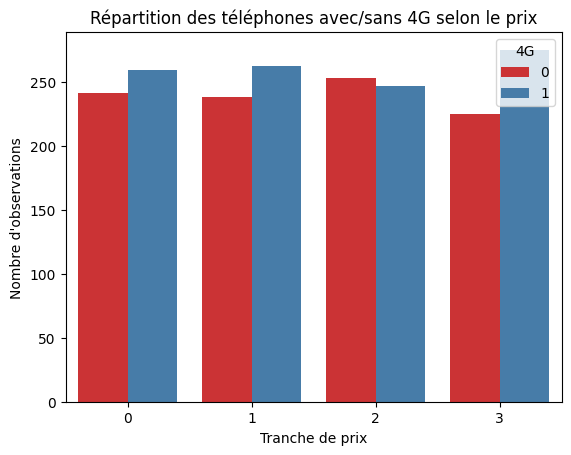

In [12]:
# 3. Countplots (pour variables binaires)
# Objectif : Voir la répartition de certaines caractéristiques binaires selon les tranches de prix (ex. 4G, dual_sim).

# Présence de 4G selon les tranches de prix
sns.countplot(x='price_range', hue='four_g', data=df, palette='Set1')
plt.title("Répartition des téléphones avec/sans 4G selon le prix")
plt.xlabel("Tranche de prix")
plt.ylabel("Nombre d'observations")
plt.legend(title='4G')
plt.show()

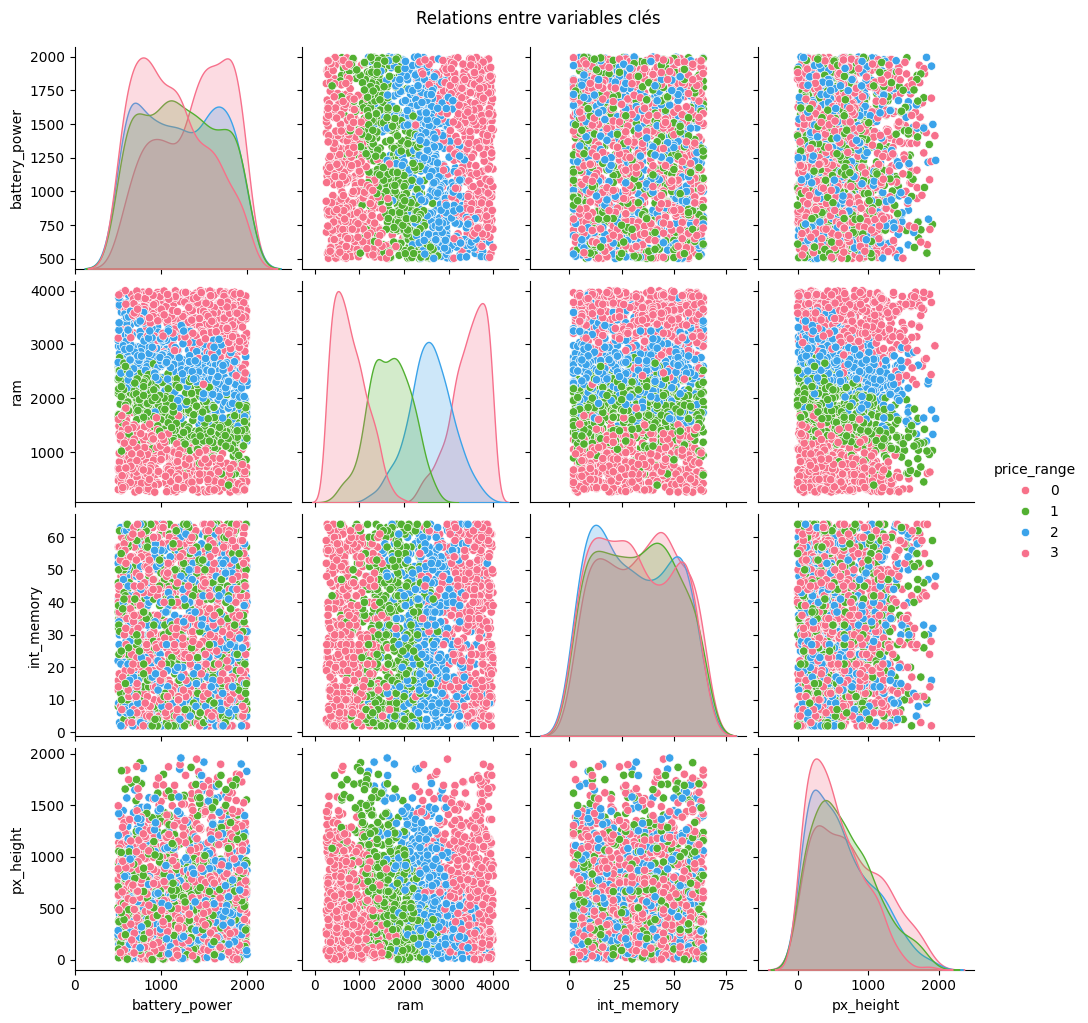

In [13]:
# 4. Pairplot (optionnel si dataset pas trop gros)
# Objectif : Avoir une vue d’ensemble des interactions entre plusieurs variables.

# Exemple avec un sous-ensemble de features
subset = df[['battery_power', 'ram', 'int_memory', 'px_height', 'price_range']]
sns.pairplot(subset, hue='price_range', palette='husl')
plt.suptitle("Relations entre variables clés", y=1.02)
plt.show()

# 5. Insight Synthesis

# Analytical Insights


RAM exhibits the strongest correlation with price (r = 0.92) and remains a primary driver of price classification.

Battery power, screen size, internal memory, and number of cores are also significant contributors to price range, particularly in the mid to high segments.

4G capability is strongly associated with higher prices (p < 0.001), while features like Bluetooth (blue) or dual SIM support show weak or statistically insignificant effects.

Front camera resolution has a weak positive correlation with price (r = 0.15).

T-tests confirm that several feature differences between price categories are statistically significant (p < 0.05), reinforcing the role of hardware specifications in price positioning.

# Business Recommendations

Prioritize RAM upgrades to position devices in premium price tiers and justify higher pricing.

Bundle 4G capability with higher-end models to align with consumer expectations and segment differentiation.

Optimize battery life and screen dimensions to enhance competitiveness in the mid-range segment.

Deprioritize low-impact features (e.g., dual SIM, Bluetooth) in marketing or hardware cost allocation unless targeting niche user needs.